# Sequential walk experiment

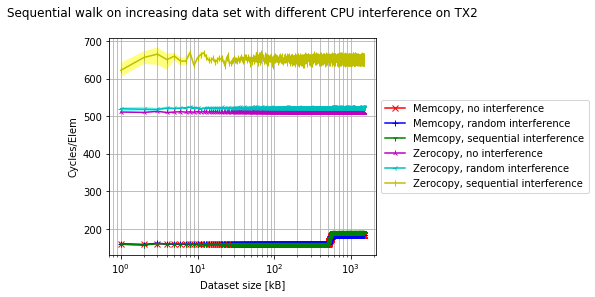

In [1]:
%matplotlib inline
import plotdata

**General benchmark description**

The plot above shows the sequential-walk benchmark using traditional memory copy operation on GPU and host-pinned zerocopy memory. For the compilation -dlcm=cg was used which equals the default setting for tegra devices. This setting means, that global loads and stores are cached in L2 and L1 is used only for local loads and stores. During the execution of the GPU-random walk, different interferences were launched on all CPU cores.

2 different interference methods were used:
1. Random interference: Each core on the CPU was performing random copy operations between two arrays of size 8MBytes.
2. Sequential interference: Each core on the CPU was performing sequential copy operations between two arrays of size 8MBytes.

To maximize the stress on the memory controller, the elements of the arrays were chosen to be 64 bytes which equals the size of a cacheline on the CPU side.
To have an appropriate comparison, the sequential walk example was additionally launched without interference.

**Result**

Starting from the tests driven by traditional memory copy operations it can nicely be seen, how the CPU interference does not affect global loads for dataset sizes up to 512MBytes. Since this loads still fit into the L2 cache of the GPU no accesses to the main memory are needed and therefore no contention between CPU and GPU occure. For bigger datasets the contention becomes visible, since the GPU needs to serve cache misses in L2 cache from the shared DRAM. It appears that the sequential interference from CPU affects the global loads from DRAM more than the random interference. The results of this sequential walk example are similar to the random walk experiment.

The host pinned zerocopy test runs show much higher overhead for memory reads than the traditional variant. This was expected since Nvidia stated in the developer forums that host-pinned zerocopy memory is not cached at all to provide coherence between CPU and GPU. This leads to the problem that the CPU interference also disturbes the random walks for small dataset sizes. In contrast to the random walk example, the zero-copy variant using a sequential walk does not exipit bigger overheads it the arraysize exceeds the 512MB L2 cache size.